<font size="9">EAS SchedTune Evaluation</font><br>
<hr>

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

In [2]:
# Generate plots inline
%matplotlib inline

import json
import os

# Support for trace events analysis
from trace import Trace

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

Populating the interactive namespace from numpy and matplotlib


# Test setup

In [3]:
# Base folder where tests folder are located
res_dir = '../../results_latest'
logging.info('Content of the output folder %s', res_dir)
!tree {res_dir}

05:59:43  INFO    : Content of the output folder ../../results_latest


../../results_latest
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   └── platform.json
├── rtapp:boost60:mixprof
│   ├── 1
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   └── trace.dat
│   └── platform.json
└── rtapp:noboost:mixprof
    ├── 1
    │   ├── energy.json
    │   ├── mixprof_00.json
    │   ├── output.log
    │   ├── rt-app-task_r5_10-60-0.log
    │   └── trace.dat
    └── platform.json

8 directories, 24 files


# Configuration

In [4]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1/'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
        "sched_switch",
        "sched_contrib_scale_f",
        "sched_load_avg_cpu",
        "sched_load_avg_task",
        "sched_tune_tasks_update",
        "sched_boost_cpu",
        "sched_boost_task",
        "sched_energy_diff",
        "cpu_frequency",
        "cpu_capacity"
    ]
    trace = Trace(run_dir, events, platform)
    
    # Define time ranges for all the temporal plots
    trace.setXTimeRange(t_min, t_max)
    
    # Tasks plots
    trace.analysis.tasks.plotTasks(pa.tasks())
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster and CPUs plots
    trace.analysis.frequency.plotClusterFrequencies()
    trace.analysis.cpus.plotCPU()


# Results

## No Boosting

05:59:43  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
05:59:52  INFO    :   task    task_r5_10-60 found, pid: [20343]
05:59:52  INFO    : Collected events spans a 14.418 [s] time interval
05:59:52  INFO    : Set plots time range to (0.000000, 14.417802)[s]
05:59:52  INFO    : Set plots time range to (0.000000, 14.417802)[s]
05:59:52  INFO    :   task    task_r5_10-60 found, pid: [20343]
05:59:52  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.97, std: 0.35
05:59:53  INFO    : LITTLE cluster average frequency: 0.591 GHz
05:59:53  INFO    : big    cluster average frequency: 0.804 GHz


Maximum estimated system energy: 36147


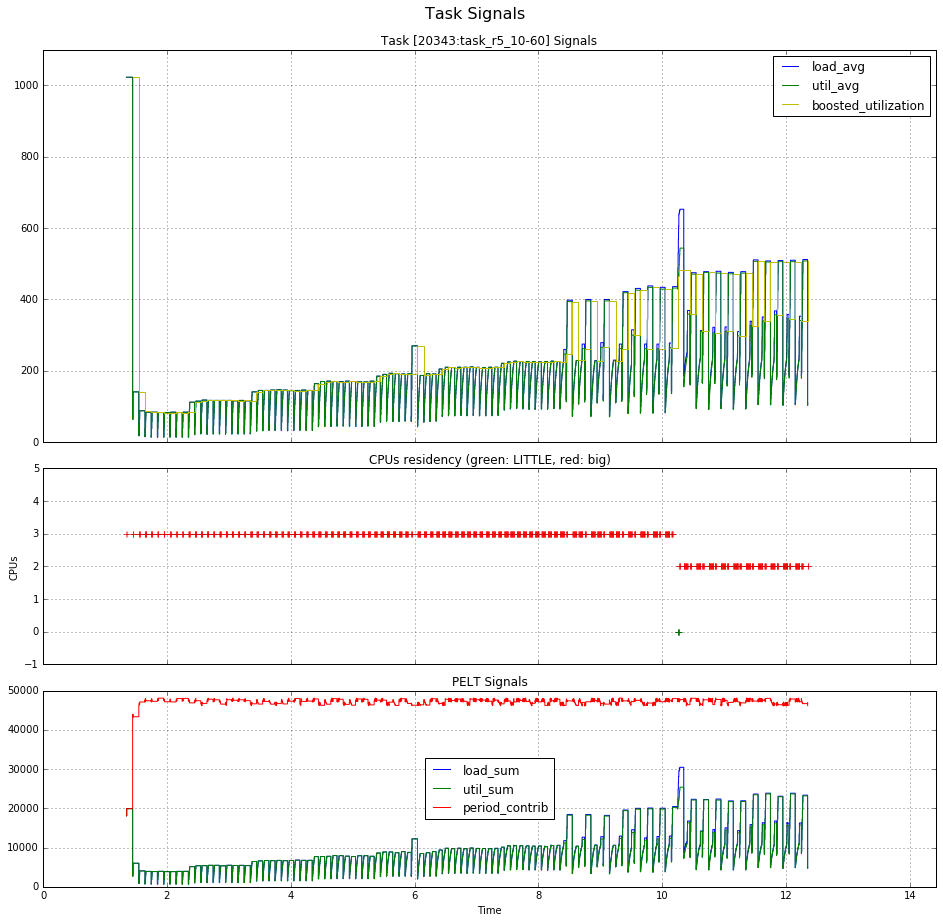

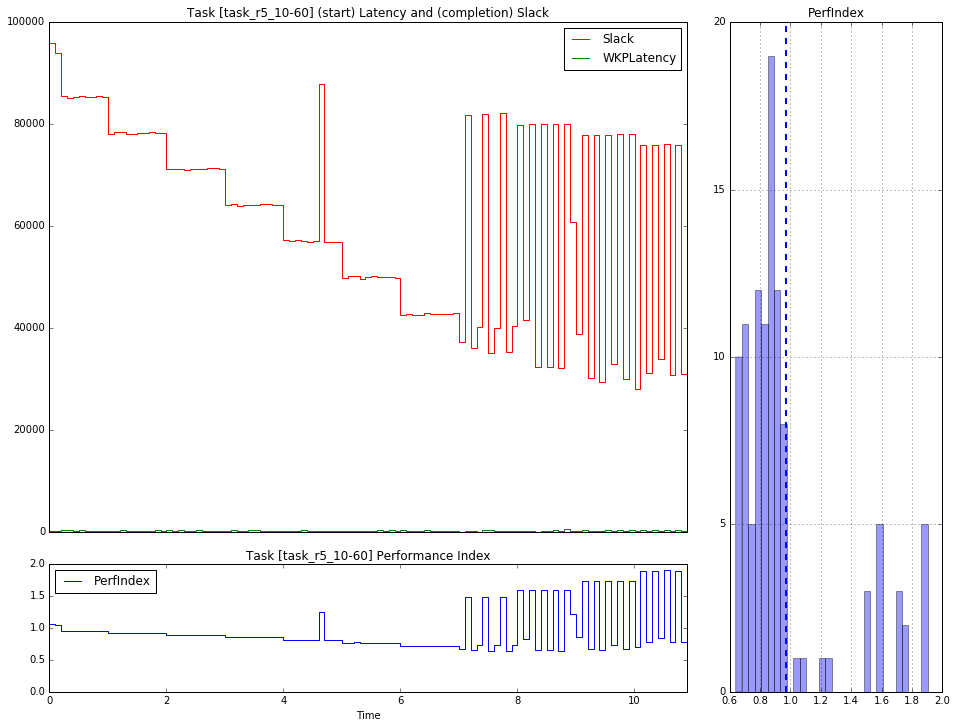

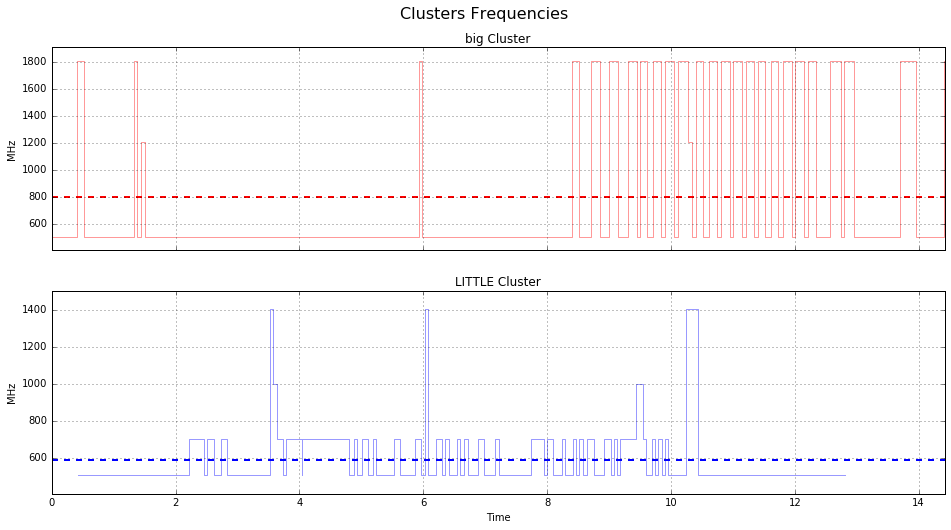

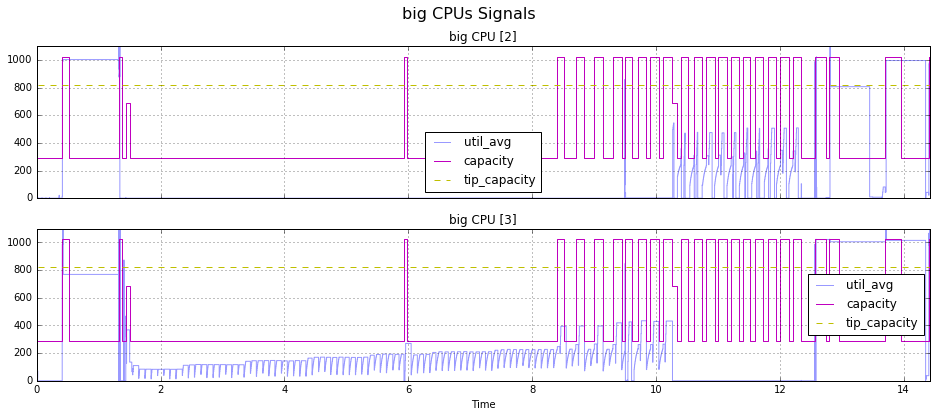

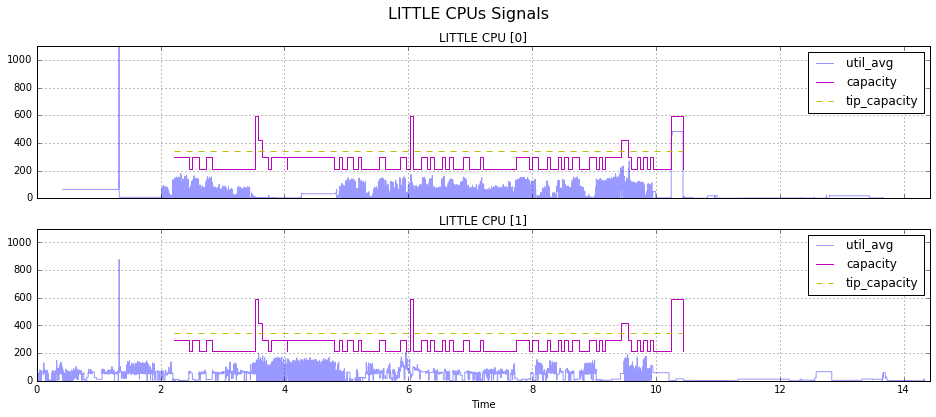

In [5]:
analysis('noboost')

## Boost 15%

05:59:55  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
06:00:00  INFO    :   task    task_r5_10-60 found, pid: [20419]
06:00:00  INFO    : Collected events spans a 14.408 [s] time interval
06:00:00  INFO    : Set plots time range to (0.000000, 14.407649)[s]
06:00:00  INFO    : Set plots time range to (0.000000, 14.407649)[s]
06:00:00  INFO    :   task    task_r5_10-60 found, pid: [20419]
06:00:00  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.96, std: 0.27
06:00:01  INFO    : LITTLE cluster average frequency: 0.560 GHz
06:00:01  INFO    : big    cluster average frequency: 0.764 GHz


Maximum estimated system energy: 36147


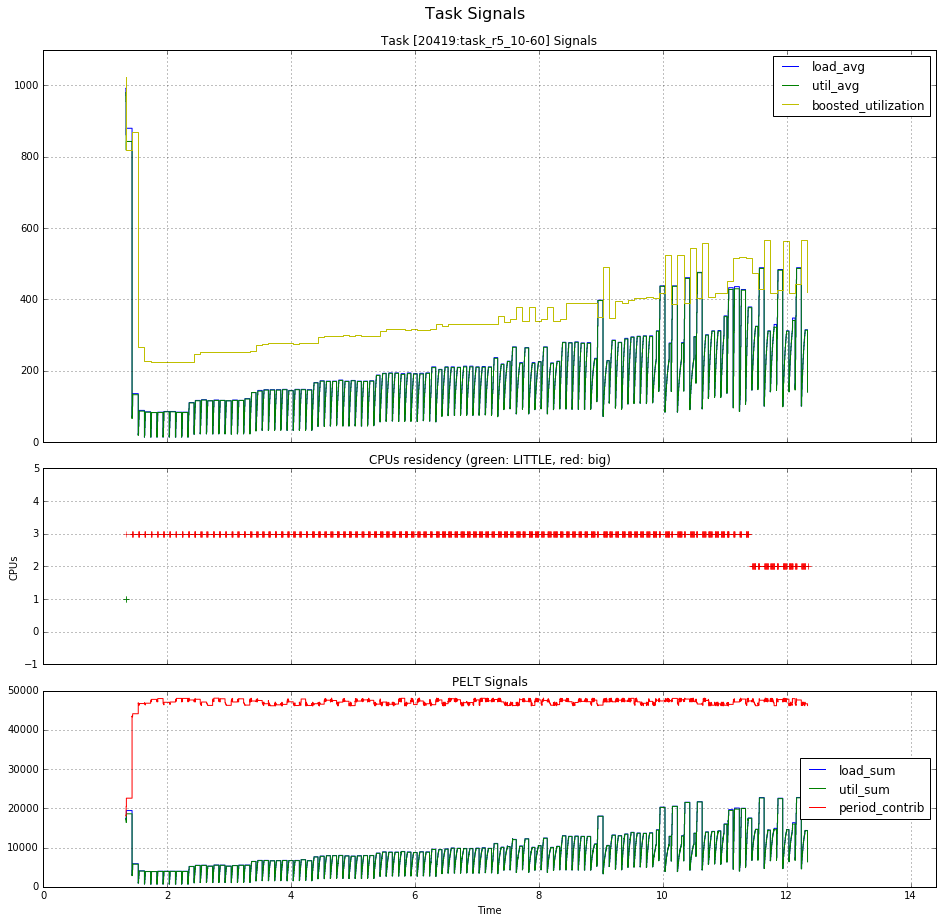

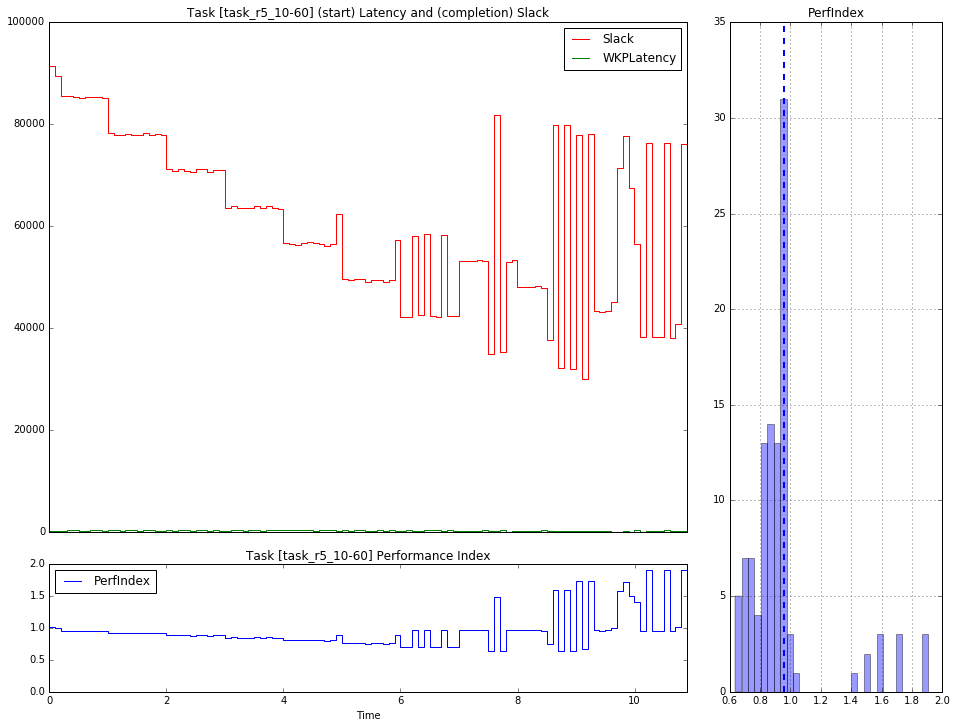

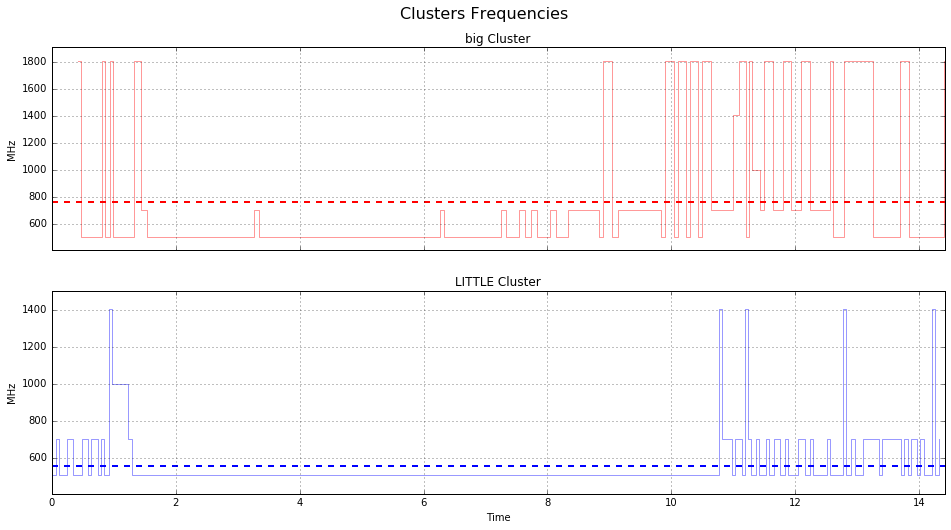

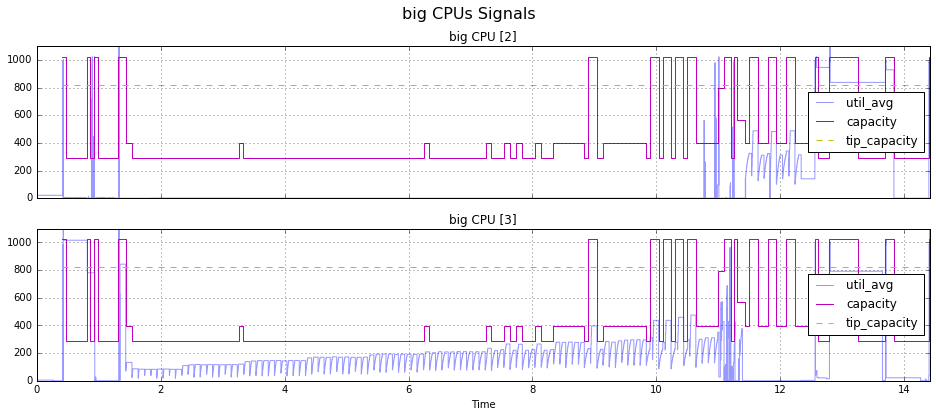

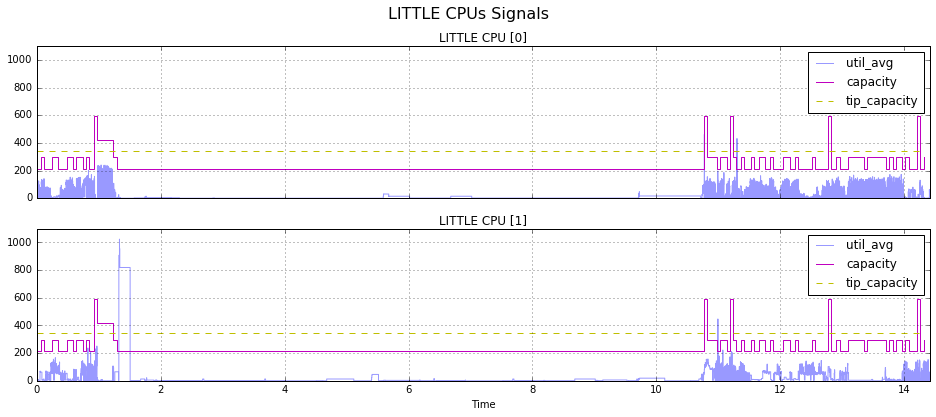

In [6]:
analysis('boost15')

## Boost 30%

06:00:02  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
06:00:11  INFO    :   task    task_r5_10-60 found, pid: [20489]
06:00:11  INFO    : Collected events spans a 14.400 [s] time interval
06:00:11  INFO    : Set plots time range to (0.000000, 14.399700)[s]
06:00:11  INFO    : Set plots time range to (0.000000, 14.399700)[s]
06:00:11  INFO    :   task    task_r5_10-60 found, pid: [20489]
06:00:12  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.09, std: 0.25
06:00:12  INFO    : LITTLE cluster average frequency: 0.571 GHz
06:00:12  INFO    : big    cluster average frequency: 0.926 GHz


Maximum estimated system energy: 36147


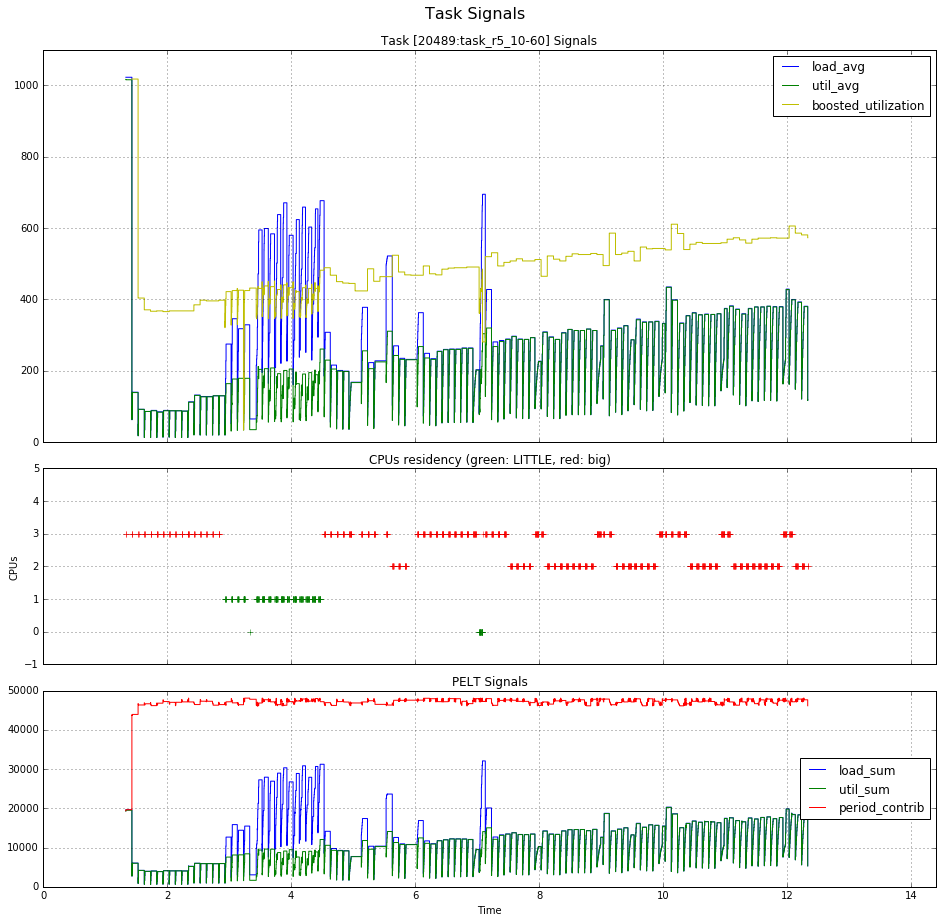

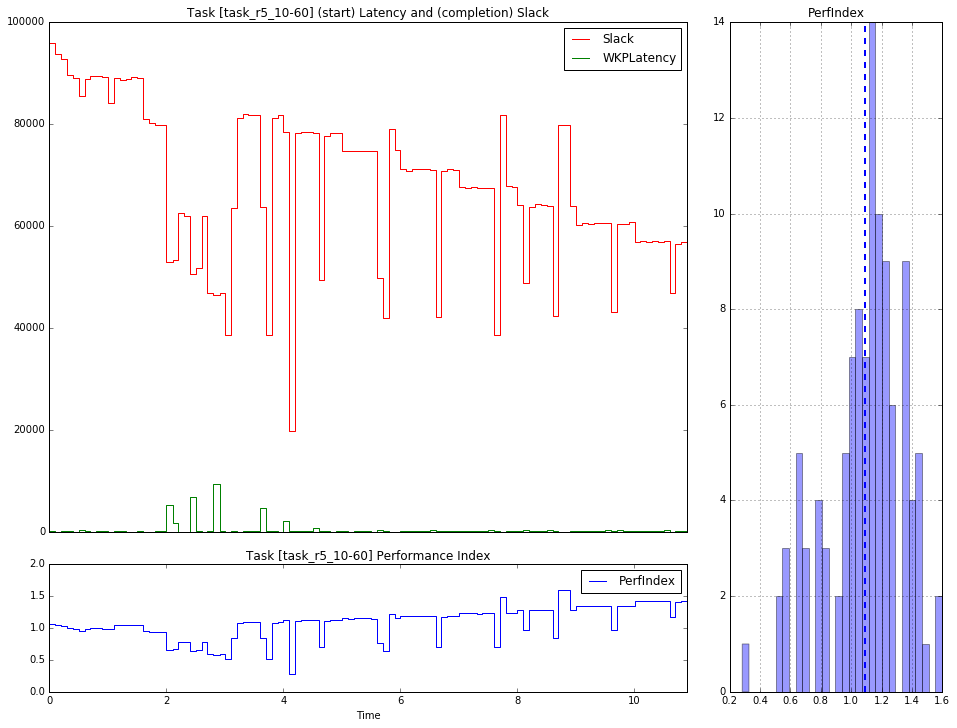

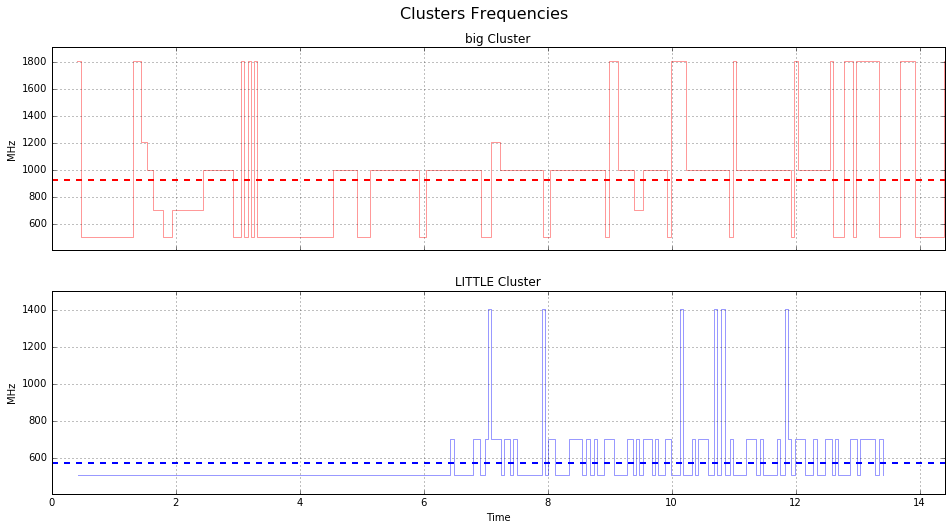

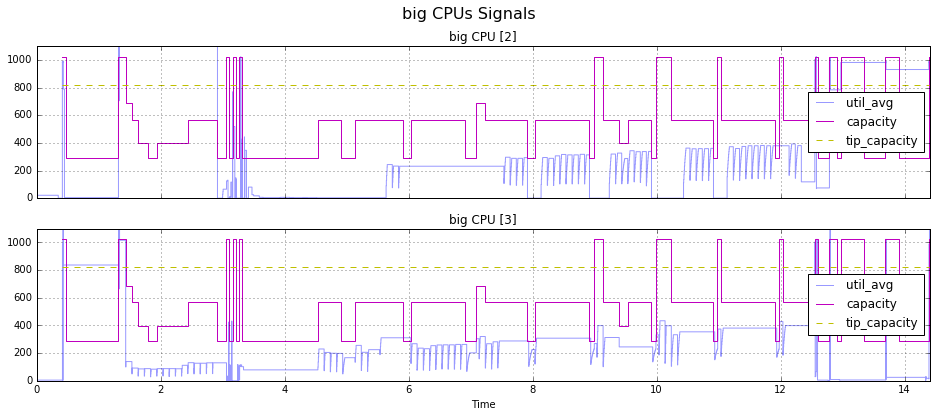

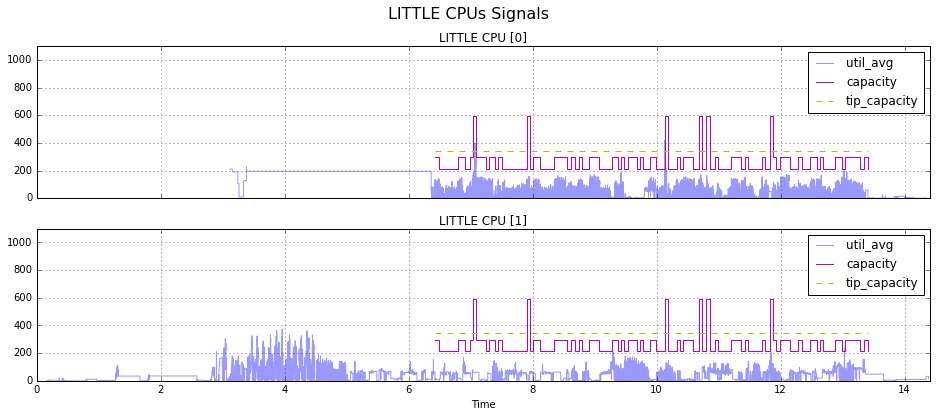

In [7]:
analysis('boost30')

## Boost 60%

06:00:14  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
06:00:19  INFO    :   task    task_r5_10-60 found, pid: [20569]
06:00:19  INFO    : Collected events spans a 14.426 [s] time interval
06:00:19  INFO    : Set plots time range to (0.000000, 14.425510)[s]
06:00:19  INFO    : Set plots time range to (0.000000, 14.425510)[s]
06:00:19  INFO    :   task    task_r5_10-60 found, pid: [20569]
06:00:20  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.29, std: 0.29
06:00:20  INFO    : LITTLE cluster average frequency: 0.546 GHz
06:00:20  INFO    : big    cluster average frequency: 1.307 GHz


Maximum estimated system energy: 36147


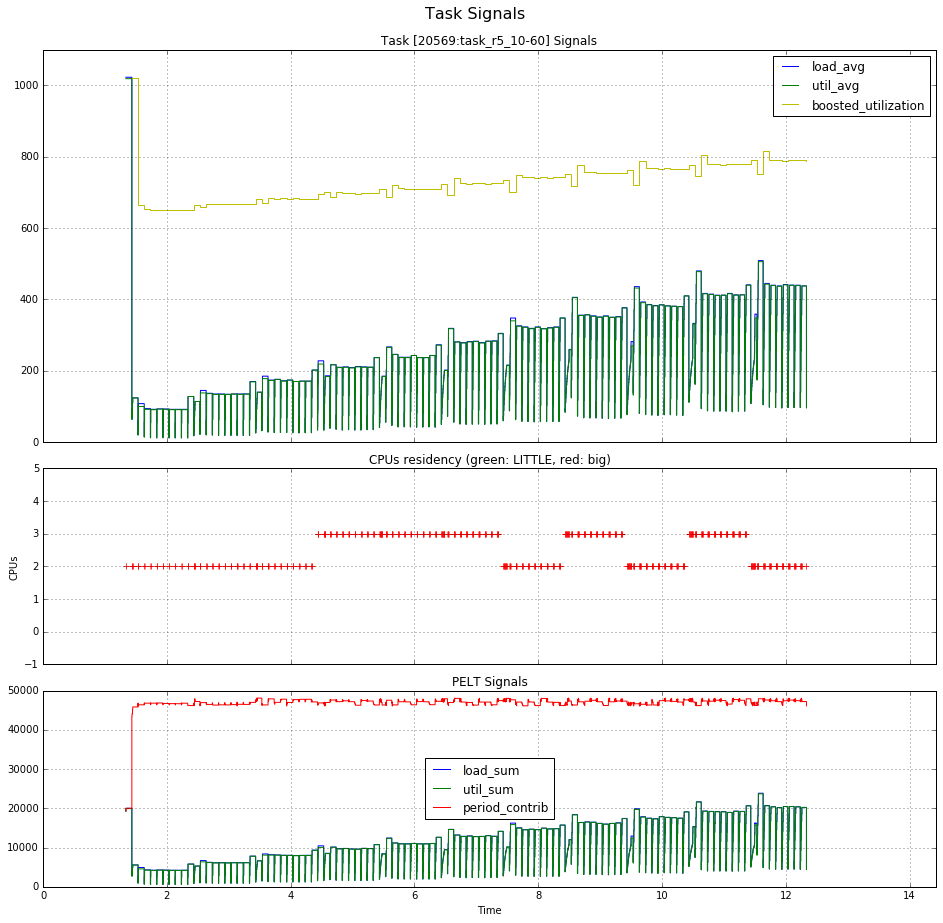

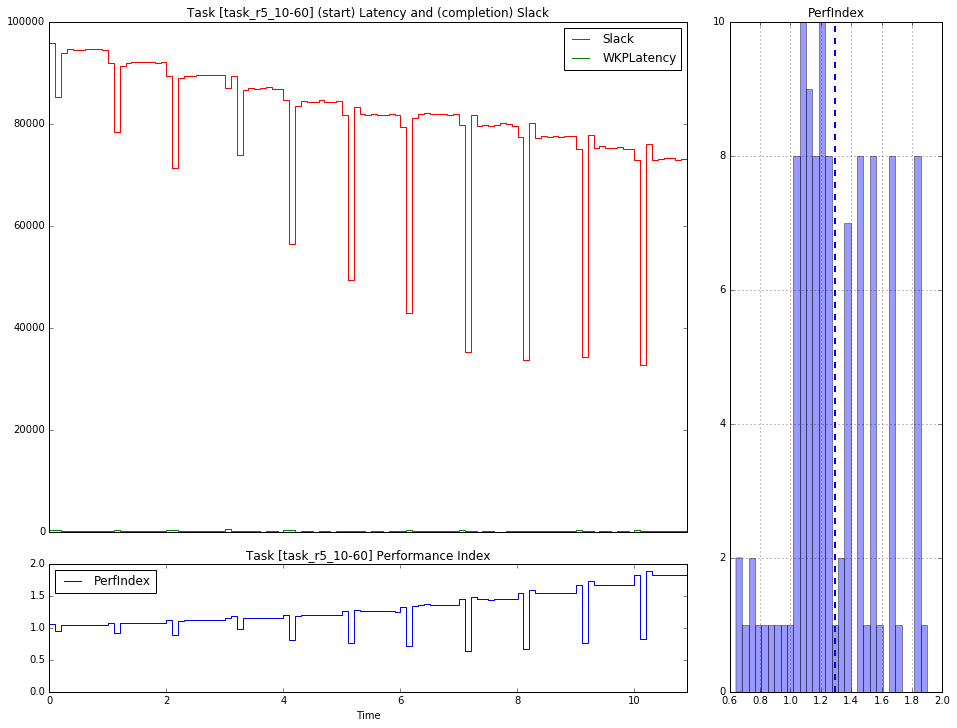

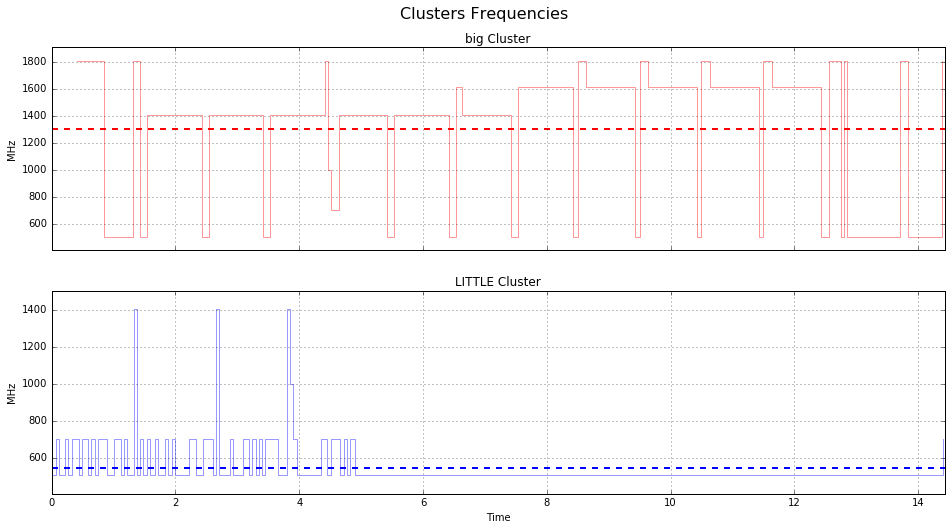

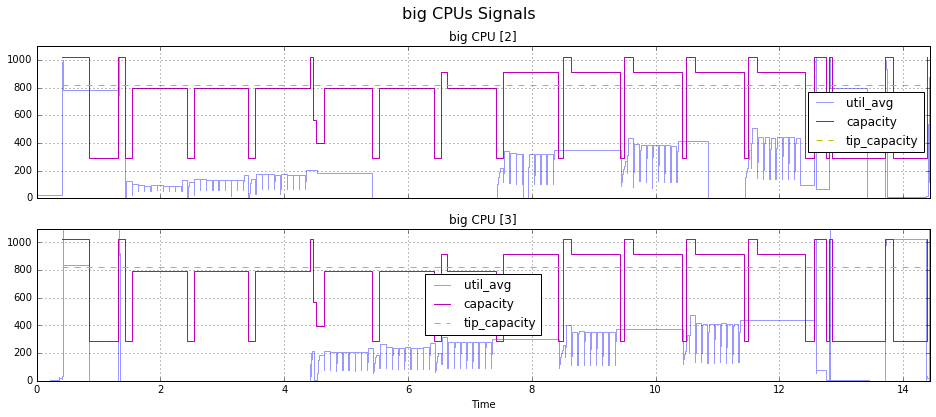

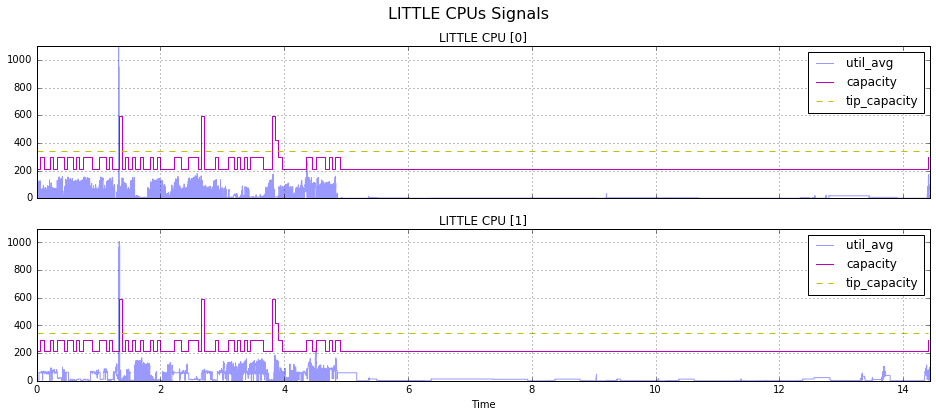

In [8]:
analysis('boost60')